<font color='#DEB887'>Machine Learning Code for BTCrypto User Interface</font>


##<font color='#872657'>Importing libraries</font>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as datetime
import plotly.express as px

import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
from sklearn import preprocessing
from joblib import dump, load

np.random.seed(7)

##<font color='#F67280'>Getting real-time data</font>

In [ ]:
#READ DATA
df = pd.read_csv('https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv', index_col=None)
df.head(3)

,,,,,,,,,https://www.CryptoDataDownload.com
unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
1652918400000,2022-05-19 00:00:00,BTC/USDT,28700.60,29004.90,28682.20,28962.00,8234.002,237326303.48805,67103
1652832000000,2022-05-18 00:00:00,BTC/USDT,30437.00,30700.00,28629.60,28700.60,426700.457,12571901286.27471,4172681


In [ ]:
len(df)

986

In [ ]:
df.reset_index(inplace = True)
df.head(3)

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,https://www.CryptoDataDownload.com
0,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
1,1652918400000,2022-05-19 00:00:00,BTC/USDT,28700.60,29004.90,28682.20,28962.00,8234.002,237326303.48805,67103
2,1652832000000,2022-05-18 00:00:00,BTC/USDT,30437.00,30700.00,28629.60,28700.60,426700.457,12571901286.27471,4172681


In [ ]:
df.rename(columns=df.iloc[0], inplace = True)
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
1,1652918400000,2022-05-19 00:00:00,BTC/USDT,28700.60,29004.90,28682.20,28962.00,8234.002,237326303.48805,67103
2,1652832000000,2022-05-18 00:00:00,BTC/USDT,30437.00,30700.00,28629.60,28700.60,426700.457,12571901286.27471,4172681
3,1652745600000,2022-05-17 00:00:00,BTC/USDT,29866.40,30794.00,29420.00,30437.00,398624.519,12050567026.40218,4083135
4,1652659200000,2022-05-16 00:00:00,BTC/USDT,31324.30,31327.40,29052.30,29866.70,507243.166,15148324200.34817,5014012


In [ ]:
df.drop(df.index[0], inplace=True)
df.reset_index(drop=True, inplace = True)
df.head(3)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1652918400000,2022-05-19 00:00:00,BTC/USDT,28700.60,29004.90,28682.20,28962.00,8234.002,237326303.48805,67103
1,1652832000000,2022-05-18 00:00:00,BTC/USDT,30437.00,30700.00,28629.60,28700.60,426700.457,12571901286.27471,4172681
2,1652745600000,2022-05-17 00:00:00,BTC/USDT,29866.40,30794.00,29420.00,30437.00,398624.519,12050567026.40218,4083135


In [ ]:
df = df.astype({"unix": float})
df = df.astype({"open": float})
df = df.astype({"high": float})
df = df.astype({"low": float})
df = df.astype({"close": float})
df = df.astype({"Volume BTC": float})
df = df.astype({"Volume USDT": float})
df = df.astype({"tradecount": float})

In [ ]:
print(df.dtypes)
print("\n*** DF ***")
df_copy = df.copy()
df_copy.head(3)

unix           float64
date            object
symbol          object
open           float64
high           float64
low            float64
close          float64
Volume BTC     float64
Volume USDT    float64
tradecount     float64
dtype: object

*** DF ***


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.652918e+12,2022-05-19 00:00:00,BTC/USDT,28700.6,29004.9,28682.2,28962.0,8234.002,2.373263e+08,67103.0
1,1.652832e+12,2022-05-18 00:00:00,BTC/USDT,30437.0,30700.0,28629.6,28700.6,426700.457,1.257190e+10,4172681.0
2,1.652746e+12,2022-05-17 00:00:00,BTC/USDT,29866.4,30794.0,29420.0,30437.0,398624.519,1.205057e+10,4083135.0


In [ ]:
#CLEAN DATA TIMESTAMP

def change_timestamp (ts):
    digit_count = len(str(ts))
    if digit_count == 12:
        return (datetime.datetime.utcfromtimestamp(ts)).strftime('%Y-%m-%d %H:%M:%S')
    else:
        return (datetime.datetime.utcfromtimestamp(ts/1000)).strftime('%Y-%m-%d %H:%M:%S')

df_copy['unix_count'] = df.unix.apply(lambda x: len(str(x)))        
df_copy['dt_correct'] = df.unix.apply(lambda x: change_timestamp(x))
df_copy['dt'] = pd.to_datetime(df_copy.dt_correct.values)
df_copy['week_day'] = df_copy.dt.apply(lambda x: x.weekday())
df_copy.sort_values(by=['unix'],ascending=[True],inplace=True)

In [ ]:
df_work = df_copy[['dt','week_day','close','Volume BTC']]
df_work.head()

,dt,week_day,close,Volume BTC
984,2019-09-08,6,10391.63,3096.291
983,2019-09-09,0,10307.00,14824.373
982,2019-09-10,1,10102.02,9068.955
981,2019-09-11,2,10159.55,10897.922
980,2019-09-12,3,10415.13,15609.634


##<font color='#728FCE'>Data Splitting and Data normalization</font>

In [ ]:
#SPLIT DATA INTO TEST AND TRAIN
X = df_work[['week_day','Volume BTC','close']]
Y = df_work[['close']]

#NORMALIZATION
f_transformer = preprocessing.MinMaxScaler((-1,1))
f_transformer = f_transformer.fit(X)

cnt_transformer = preprocessing.MinMaxScaler((-1,1))
cnt_transformer = cnt_transformer.fit(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle = False)

X_train_trans = f_transformer.transform(X_train)
X_test_trans = f_transformer.transform(X_test)

y_train_trans = cnt_transformer.transform(y_train)
y_test_trans = cnt_transformer.transform(y_test)

print("*** SHAPES")
print("X_train: %s, %s" % (X_train.shape[0],X_train.shape[1]))
print("X_test: %s, %s" % (X_test.shape[0],X_test.shape[1]))
print("y_train: %s, %s" % (y_train.shape[0],y_train.shape[1]))
print("y_test: %s, %s" % (y_test.shape[0],y_test.shape[1]))

print("\n*** MIN MAX")

print("TRAIN COST: %d, %d" % (X_train.close.min(), X_train.close.max()))
print("TEST COST: %d, %d" % (X_test.close.min(), X_test.close.max()))
print("TRAIN VOL: %d, %d" % (X_train['Volume BTC'].min(), X_train['Volume BTC'].max()))
print("TEST VOL: %d, %d" % (X_test['Volume BTC'].min(), X_test['Volume BTC'].max()))

print("\n*** MIN MAX PARAMETER")
print(f_transformer.data_min_)
print(f_transformer.data_max_)
print(cnt_transformer.data_min_)
print(cnt_transformer.data_max_)

*** SHAPES
X_train: 788, 3
X_test: 197, 3
y_train: 788, 1
y_test: 197, 1

*** MIN MAX
TRAIN COST: 4764, 66064
TEST COST: 28700, 67606
TRAIN VOL: 3096, 1531824
TEST VOL: 8234, 1101875

*** MIN MAX PARAMETER
[   0.    3096.291 4764.65 ]
[6.00000000e+00 1.53182485e+06 6.76069600e+04]
[4764.65]
[67606.96]


In [ ]:
X_train.head()

,week_day,Volume BTC,close
984,6,3096.291,10391.63
983,0,14824.373,10307.00
982,1,9068.955,10102.02
981,2,10897.922,10159.55
980,3,15609.634,10415.13


In [ ]:
#CREATE LAGGING DATASET FOR TIME-SERIES
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 1
# reshape to [samples, time_steps, n_features]
X_train_f, y_train_f = create_dataset(X_train_trans, y_train_trans, time_steps)
X_test_f, y_test_f = create_dataset(X_test_trans, y_test_trans, time_steps)

print("*** SHAPES")
print(X_train_f.shape, y_train_f.shape)
print(X_test_f.shape, y_test_f.shape)

*** SHAPES
(787, 1, 3) (787, 1)
(196, 1, 3) (196, 1)


##<font color='#FF8040'>Model</font>

In [ ]:
seq_size = 183

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=((X_train_f.shape[1], X_train_f.shape[2]))))
model.add(layers.Bidirectional(layers.LSTM(300, activation = 'tanh', return_sequences=True)))
model.add(layers.LSTM(300, return_sequences=True, activation = 'tanh'))
model.add(layers.LSTM(300, return_sequences=True, activation = 'tanh'))
model.add(layers.LSTM(300, return_sequences=False, activation = 'tanh'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 1, 600)           729600    
 nal)                                                            
                                                                 
 lstm_5 (LSTM)               (None, 1, 300)            1081200   
                                                                 
 lstm_6 (LSTM)               (None, 1, 300)            721200    
                                                                 
 lstm_7 (LSTM)               (None, 300)               721200    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 300)              

In [ ]:
hist = model.fit(X_train_f[-seq_size:], y_train_f[-seq_size:], batch_size = 50, epochs = 25, shuffle=False, validation_split=0.1)

Epoch 1/25
4/4 [==============================] - 11s 743ms/step - loss: 0.0857 - val_loss: 0.5538
Epoch 2/25
4/4 [==============================] - 0s 49ms/step - loss: 0.0558 - val_loss: 0.4346
Epoch 3/25
4/4 [==============================] - 0s 49ms/step - loss: 0.0359 - val_loss: 0.3580
Epoch 4/25
4/4 [==============================] - 0s 48ms/step - loss: 0.0311 - val_loss: 0.3143
Epoch 5/25
4/4 [==============================] - 0s 47ms/step - loss: 0.0368 - val_loss: 0.2705
Epoch 6/25
4/4 [==============================] - 0s 52ms/step - loss: 0.0392 - val_loss: 0.2446
Epoch 7/25
4/4 [==============================] - 0s 50ms/step - loss: 0.0436 - val_loss: 0.2460
Epoch 8/25
4/4 [==============================] - 0s 49ms/step - loss: 0.0451 - val_loss: 0.2444
Epoch 9/25
4/4 [==============================] - 0s 51ms/step - loss: 0.0440 - val_loss: 0.2488
Epoch 10/25
4/4 [==============================] - 0s 46ms/step - loss: 0.0426 - val_loss: 0.2650
Epoch 11/25
4/4 [==========

In [ ]:
X.head(2)

,week_day,Volume BTC,close
984,6,3096.291,10391.63
983,0,14824.373,10307.00


In [ ]:
X_train.head(2)

,week_day,Volume BTC,close
984,6,3096.291,10391.63
983,0,14824.373,10307.00


##<font color='lightblue'>Forecast</font>

###Getting predicted future values

In [ ]:
X_trans = f_transformer.transform(X)
y_trans = cnt_transformer.transform(Y)

In [ ]:
X_f, y_f = create_dataset(X_trans, y_trans, time_steps)

In [ ]:
prediction = [] #Empty list to populate later with predictions
future = 7 #Number of days to predict

In [ ]:
#forecast
prediction = np.empty(7) #Empty list to populate later with predictions
 #Take last 7 days
#current_batch = current_batch.reshape(1, 24*seq_size, n_features) #Reshape
      
## Predict future, beyond test dates
future = 7 #Days

current_batch = X_f[-seq_size:]
current_pred = model.predict(current_batch)

In [ ]:
rescaled_prediction = pd.DataFrame(cnt_transformer.inverse_transform(current_pred))
rescaled_prediction.columns = ['Price']

In [ ]:
next_week_prices = rescaled_prediction.iloc[:7]

### <font color='orange'>Plot</font>

####Get dates for plot x-axis

In [ ]:
future=183

In [ ]:
#Get dates
time = pd.to_datetime(df_work['dt'])

#Add new dates for the forecast period
time_series_array = []

for i in range(0, future+1):
    time_series_array.append(pd.Series(time.dt.date.iloc[-1]+ pd.DateOffset(i)))

time=pd.DataFrame(time_series_array)
time=time.rename(columns={0:'date'})
time.head(2)

,date
0,2022-05-19
1,2022-05-20


In [ ]:
past_dates = pd.Series(df_work['dt'].tail(future))

In [ ]:
past_week_dates = df_work['dt'].tail(7)
past_week_dates.reset_index(drop=True, inplace=True)
past_week_dates.columns = ['Date']

In [ ]:
past_dates.reset_index(drop=True, inplace=True)
past_dates = past_dates.iloc[0:(future-1)]
past_dates

0     2021-11-18
1     2021-11-19
2     2021-11-20
3     2021-11-21
4     2021-11-22
         ...    
177   2022-05-14
178   2022-05-15
179   2022-05-16
180   2022-05-17
181   2022-05-18
Name: dt, Length: 182, dtype: datetime64[ns]

In [ ]:
future_dates = pd.Series(time['date']).tail(future+1)

In [ ]:
plot_dates = pd.concat([past_dates, future_dates], axis=0)

####<font color='lightgreen'>Plotting predictions for the next 6 months</font>

In [ ]:
historical = pd.DataFrame(data = df_work['close'].tail(183))
historical.columns = ['Price']
historical = historical.iloc[0:(future-1)]

In [ ]:
type1 = []

for i in range(future):
  type1.append('Historical')

type1 = pd.DataFrame(type1, columns = ['Type'])

In [ ]:
historical.reset_index(drop=True, inplace=True)

In [ ]:
historical = pd.concat([historical,type1], axis=1)

In [ ]:
historical.head(2)

,Price,Type
0,56921.05,Historical
1,58069.51,Historical


In [ ]:
type2 = []

for i in range(future):
  type2.append('Predicted')

type2 = pd.DataFrame(type2, columns = ['Type'])

In [ ]:
rescaled_prediction = pd.DataFrame(cnt_transformer.inverse_transform(current_pred))
rescaled_prediction.columns = ['Price']

In [ ]:
current_price = pd.DataFrame(data = df_work['close'].tail(1))
current_price.reset_index(drop=True, inplace=True)
current_price.columns= ['Price']

In [ ]:
rescaled_prediction = pd.concat([current_price,rescaled_prediction], axis=0)

In [ ]:
rescaled_prediction_df = pd.concat([rescaled_prediction,type2], axis=1)

In [ ]:
rescaled_prediction.head(2)

,Price
0,28962.000000
0,45401.289062


In [ ]:
prices = pd.DataFrame()

In [ ]:
prices = pd.concat([historical, rescaled_prediction_df], axis=0)

In [ ]:
print(prices.head(2), prices.tail(2))

      Price        Type
0  56921.05  Historical
1  58069.51  Historical             Price       Type
181  43890.253906  Predicted
182  43806.566406  Predicted


In [ ]:
plot_dates = pd.DataFrame(plot_dates)
plot_dates.reset_index(drop=True, inplace=True)
plot_dates.columns = ['Date']

In [ ]:
plotdf = pd.DataFrame()

In [ ]:
plot_dates.reset_index(drop=True, inplace=True)
prices.reset_index(drop=True, inplace=True)

In [ ]:
plotdf = pd.concat([plot_dates,prices], axis=1)
plotdf.reset_index(drop=True, inplace=True)
plotdf.set_index(['Date'], drop=True, inplace=True)

In [ ]:
plotdf.head()

,Price,Type
Date,,
2021-11-18,56921.05,Historical
2021-11-19,58069.51,Historical
2021-11-20,59716.29,Historical
2021-11-21,58661.39,Historical
2021-11-22,56268.31,Historical


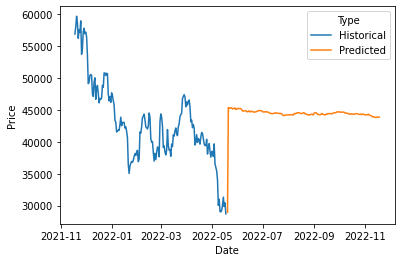

In [ ]:
import seaborn as sns
sns.lineplot(x='Date', y='Price', hue='Type', data= plotdf)

In [ ]:
fig = px.line(prices, x=plotdf.index.values, y="Price", color='Type', title='Bitcoin Price')
fig.show()

In [ ]:
plotdf[:7].to_csv('prediction_machine_learning_next_7_days.csv')

In [ ]:
plotdf.to_csv('prediction_machine_learning.csv')

####<font color='lightgreen'>Plotting predictions for the next week</font>

In [ ]:
future=7

#####Creating Historical Price Dataframe

In [ ]:
h_week = pd.DataFrame(df_work['close'].tail(future))
#h_week = h_week.iloc[0:(future-1)]
h_week.columns = ['Price']
h_week.head(2)

,Price
6,29274.3
5,30079.8


In [ ]:
type1 = []

for i in range(future):
  type1.append('Historical')

type1 = pd.DataFrame(type1, columns = ['Type'])
type1.head(2)

,Type
0,Historical
1,Historical


In [ ]:
h_week.reset_index(drop=True, inplace=True)

In [ ]:
h_week = pd.concat([h_week,type1], axis=1)
h_week.head(2)

,Price,Type
0,29274.3,Historical
1,30079.8,Historical


In [ ]:
h_week = pd.concat([past_week_dates,h_week,], axis=1)
h_week.head(2)

,dt,Price,Type
0,2022-05-13,29274.3,Historical
1,2022-05-14,30079.8,Historical


In [ ]:
h_week.set_index(['dt'], drop= True, inplace=True)

In [ ]:
h_week

,Price,Type
dt,,
2022-05-13,29274.3,Historical
2022-05-14,30079.8,Historical
2022-05-15,31324.4,Historical
2022-05-16,29866.7,Historical
2022-05-17,30437.0,Historical
2022-05-18,28700.6,Historical
2022-05-19,28962.0,Historical


#####Creating Predicted Price Dataframe

In [ ]:
rescaled_week = pd.DataFrame(cnt_transformer.inverse_transform(current_pred)[:7])
rescaled_week.columns = ['Price']
rescaled_week.head(2)

,Price
0,45401.289062
1,45237.296875


In [ ]:
current_price = pd.DataFrame(df_work['close'].tail(1))
current_price.columns = ['Price']
current_price.reset_index(drop=True, inplace=True)

In [ ]:
rescaled_week = pd.concat([current_price,rescaled_week], axis=0)
rescaled_week.reset_index(drop=True, inplace=True)

In [ ]:
type2 = []

for i in range(future+1):
  type2.append('Predicted')

type2 = pd.DataFrame(type2, columns = ['Type'])
type2.head(2)

,Type
0,Predicted
1,Predicted


In [ ]:
p_week = pd.concat([rescaled_week,type2], axis=1)
p_week.head(2)

,Price,Type
0,28962.000000,Predicted
1,45401.289062,Predicted


In [ ]:
next_week_dates = pd.DataFrame(future_dates.iloc[:7])
next_week_dates.columns = ['dt']

In [ ]:
p_week = pd.concat([next_week_dates,p_week], axis=1)
p_week.set_index(['dt'], drop=True, inplace=True)
p_week.head()

,Price,Type
dt,,
2022-05-19,28962.000000,Predicted
2022-05-20,45401.289062,Predicted
2022-05-21,45237.296875,Predicted
2022-05-22,45293.953125,Predicted
2022-05-23,45376.808594,Predicted


#####Plotting Price Dataframes

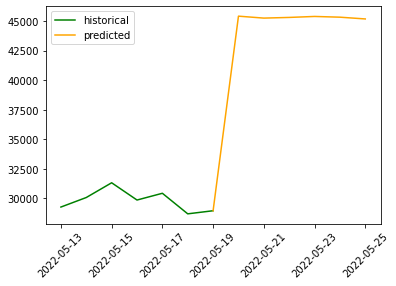

In [ ]:
import matplotlib.pyplot as plt

# plot lines
plt.plot(h_week.index.values, h_week['Price'], label = "historical", color='green')
plt.plot(p_week.index.values, p_week['Price'], label = "predicted", color='orange')
plt.legend()
plt.xticks(rotation=45)
plt.show()